In [ ]:
!pip install scikit-learn==0.23.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.8 MB 4.3 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.1 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.1 which is incompatible.


## **Cardiovascular Disease Prediction through Machine Learning**

<h1>1. Business Problem</h1>

<h2>1.1. Description of the problem</h2>

<p> Cardiovascular disease is the leading cause of death in both men and women. In the United States, heart disease accounts to about one million deaths each year.One person dies every 34 seconds in the United States from cardiovascular disease. About 697,000 people in the United States died from heart disease in 2020 which is 1 in every 5 deaths.<p>

<p> High blood pressure, high blood cholesterol, and smoking are the key risk factors for heart disease. People with high blood pressure, high LDL cholesterol, low HDL cholesterol, high triglycerides and type 2 diabetes are more prone to heart diseases. Lifestyle choices like eating an unhealthy diet, being overweight and obese, physical inactivity and excessive alcohol are the major contributing factors to heart disease.<p>

<p> Predictive methods built using machine learning and deep learning can help in preventing the devastating effect of heart diseases. A patient's factual information, medical examination results and behavioural information can help us in building a good prediction system.<p>

<p>In this case study, we will be building a machine learning based cardiovascular disease prediction system which makes predictions by using a patient's factual information, medical examination results and behavioural information.<p>



<h2>1.2. Real World Problem</h2>

<p>Given a datapoint which contains a patient's details, we want to predict whether the patient has heart disease or not.<p>

<h2>1.3. Real-world/Business objectives and constraints.</h2>

* No low-latency requirement. This means that given a datapoint which is patient's details, we do not have to make the prediction under 1 ms. We can take a few seconds or a few minutes to make the prediction. No low latency requirement allows us to use more complex models.
* Errors can be very costly. Misclassifying a patient who has heart disease and predicting that he does not have heart disease can be dangerous for the patient.
* The model should should give the probabilities of a data-point belonging to each class. This is because probability estimates give us more information. They also tell us how certain is the machine learning model while making a certain prediction.
*  The model should be interpretable. Since the model is making a crucial decision that whether a patient has heart disease or not, it should be able to give a proper reason for it's prediction. A model's prediction cannot be taken at face value.




<h1>2. Machine Learning Problem Formulation</h1>

<p> We will now pose our real world problem as a machine learning problem.<p>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- The dataset has been taken from the following source: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset
- There is only one file in the dataset which is cardio_train.csv
- This dataset contains three types of patient information which is factual information, results of medical examination and information given by the patient also known as behavioural or subjective information. 
- There are 11 features and one response label in this dataset. This dataset contains 70000 datapoints.
- <p> 
     Information contained in cardio_train.csv file:
    <ul> 
        <li>
        There are three types of input features in this file which are Objective Features, Examination Features and Subjective Features.
        </li>
        <li>
        Age, Height, Weight, Gender are the Objective Features or the factual information about the patient.
        </li>
        <li>
        Systolic blood pressure, Diastolic blood pressure, Cholesterol, Glucose are the Examination Features or the results of medical examination of the patient.
        </li>
        <li>
        Smoking, Alcohol intake, Physical activity are the Subjective Features or the information given by the patient.
    </ul>
</p>

<h3>2.1.2. Example Data Point in cardio_train.csv file</h3>

<hr>
id,age,gender,height,weight,ap_hi,ap_lo,cholestrol,gluc,smoke,alco,active,cardio<br>
0,18393,2,168,62.0,110,80,1,1,0,0,1,0<br>

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>This is a binary classification task because given a datpoint which is a patient's details we have to classify the patient into one of the two classes. He either has a heart disease or he does not have a heart disease.</p>

<h3>2.2.2. Performance Metrics</h3>

- <p>  Binary Log Loss 
  <ul>
  <li> We are using binary log loss as our performance metric because we are trying to solve a binary classification problem. Our model will give probability scores as output. Binary log loss is the only metric which uses probability scores. Other metrics like Accuracy, AUC score, precision and recall do not use probability scores. In addition, by using binary log loss, we want to penalize the model for making errors while predicting the class probabilities.
  </li>
  </ul>
  </p>

- <p>  Confusion matrix 
  <ul>
  <li> We are using confusion matrix because it is much easier to interpret. By looking at the confusion matrix, we can see the model's performance visually. Although log loss is a good performance metric but it is just one number and is not very interpretable. We are using confusion matrix because we don't want to rely on log loss only.


<h3>2.2.3. Machine Learning Objectives and Constraints</h3>

- <p>  Objectives
  <ul>
  <li> We want to predict probability of each datapoint of our dataset belonging to each of the two classes. 
  </li>
  </ul>
  </p>

- <p> Constraints
  <ul>
  <li> The model should give probability scores as output.
  </li>
  <li> We want to penalize the model for making errors while predicting the class probabilities.
  </li>
  <li> There is no strict low latency requirement.
  </li>
  <li> The model should be interpretable.



<h1>3. Exploratory Data Analysis</h1>

<h3> Importing the Necessary Libraries<h3>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV


from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

import time
import math
import sys

import warnings
warnings.filterwarnings("ignore")


<h2>3.1. Reading Data</h2>


- <p> We will use pandas to read the cardio_train.csv file. This file contains 12 features and 70000 datapoints.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
raw_data = pd.read_csv('/content/drive/MyDrive/Case Study 1/cardio_train.csv', sep=";")
raw_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
data=raw_data.copy()
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)

Number of data points :  70000
Number of features :  13
Features :  ['id' 'age' 'gender' 'height' 'weight' 'ap_hi' 'ap_lo' 'cholesterol'
 'gluc' 'smoke' 'alco' 'active' 'cardio']


<p>
  The features are:
   <ul>
      <li>Age | age | Numerical Feature | integer | in days |</li>
      <li>Height | height | Numerical Feature | integer | in cm |</li>
      <li>Weight | weight | Numerical Feature | float | in kg |</li>
      <li>Systolic blood pressure | ap_hi | Numerical Feature | integer |</li>
      <li>Diastolic blood pressure | ap_lo | Numerical Feature | integer |</li>
      <li>Gender| gender | Binary Feature | takes two values - 1,2</li>
      <li>Cholesterol | cholestrol | Categorical Feature | takes three categories - 1: normal, 2: above normal, 3: well above normal |</li>
      <li>Glucose | gluc | Categorical Feature | takes three categories - 1: normal, 2: above normal, 3: well above normal |</li>
      <li>Smoking | smoke | Binary Feature | takes two categories - 0,1</li>
      <li>Alcohol intake | alco | Binary Feature | takes two categories - 0,1</li>
      <li>Physical activity | active | Binary Feature | takes two categories - 0,1</li>
      <li>Presence or absence of cardiovascular disease | cardio | binary Feature | takes two categories - 0: no heart disease, 1: heart disease</li>

      

<h2>3.2. High Level Statistics of the Data</h2>

In [ ]:
# Get the basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
# Check if there are any missing values in the dataset
data.isnull().sum().sum()

0

<h3> Observation 

*   There are no missing values in our dataset.




In [ ]:
# Check if there are any duplicate values in the dataset
data.duplicated().sum()

0

<h3> Observation 

*   There are no duplicate values in our dataset.

In [ ]:
# Check if the dataset is balanced or imbalanced.
data['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

<h3> Observation 

*   The dataset is almost balanced. Almost equal number of datapoints are present for each class.

<p> Since the age of the patient has been 

---

given in days, so it is difficult to interpret the age. So we will convert the days into years.

In [ ]:
# Converting the days into years
data['age'] = np.round(data['age']/365,0)
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


<p> Since in the dataset it has not been explicitly given what does 1 and 2 stand for in the gender column, we will try to find out which gender do these values indicate. We will be using the fact that typically males tend to be taller than the females. So the average height of males should be more than the average height of females.

In [ ]:
p = data[data['gender']==1]['height'].mean()
q = data[data['gender']==2]['height'].mean()

if p > q:
    gender_1 = 'male'
    gender_2 = 'female'
else:
    gender_1 = 'female'
    gender_2 = 'male'

print('gender=1 is '+ gender_1 + ' and ' + 'gender=2 is ' + gender_2)

gender=1 is female and gender=2 is male


<h3> Observation 

*   gender = 1 stands for female and gender = 2 stands for male in our dataset.

In [ ]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.338686,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.765294,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<h3> Observation <h3>

- <p> height
  <ul>
  <li> The 25th percentile value of height is 159 cm but the min value of height is 55 cm. The 75th percentile value of height is 170 cm but the max value of height is 250 cm.This shows that some outliers could be present in the height column of our dataset which we need to remove.
 </li>
 </ul>
 </p>

- <p> weight
  <ul>
  <li> The 25th percentile value of weight is 65 kg but the min value of weight is 10 kg. The 75th percentile value of weight is 82 kg but the max value of height is 200 kg. This shows that some outliers could be present in the weight column of our dataset which we need to remove.
 </li>
 </ul>
 </p>

- <p> ap_hi: 
  <ul>
  <li> The 25th percentile value of ap_hi is 120 but the min value of ap_hi is -150. The 75th percentile value of ap_hi is 140 but the max value of ap_hi is 16020. This shows that some outliers could be present in the ap_hi column of our dataset which we need to remove.
  </li>
  </ul>
  </p>

- <p> ap_lo:
  <ul> 
  <li> The 25th percentile value of ap_lo is 80 but the min value of ap_lo is -70.The 75th percentile value of ap_lo is 90 but the max value of ap_lo is 11000. This shows that some outliers could be present in the ap_lo column of our dataset which we need to remove.
  </li>
  </ul>
  </p>

<h2>3.3. Univariate Analysis of the Features</h2>

<h3>3.3.1. Univariate Analysis of the height Feature</h3>

<p style="font-size:18px;"> <b>Q1.</b> What type of feature height is ?</p>
<p style="font-size:16px;"><b>Ans.</b> height is a numerical feature. </p>


Text(0.5, 1.0, 'Distribution of height')

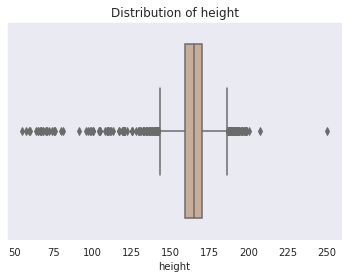

In [ ]:
sns.set_style('dark')
sns.boxplot(data['height'],palette='pink')
plt.title('Distribution of height')

<p> From the boxplot of height feature, we can see that there are some outliers.So we will remove these outliers.

In [ ]:
for i in range(90,101):
    print('{} Percentile is ='.format(i),np.percentile(data['height'], i))


90 Percentile is = 175.0
91 Percentile is = 175.0
92 Percentile is = 175.0
93 Percentile is = 176.0
94 Percentile is = 177.0
95 Percentile is = 178.0
96 Percentile is = 178.0
97 Percentile is = 180.0
98 Percentile is = 181.0
99 Percentile is = 184.0
100 Percentile is = 250.0


In [ ]:
for i in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print('{} Percentile is ='.format(i),np.percentile(data['height'], i))

99.1 Percentile is = 184.0
99.2 Percentile is = 185.0
99.3 Percentile is = 185.0
99.4 Percentile is = 185.0
99.5 Percentile is = 186.0
99.6 Percentile is = 186.0
99.7 Percentile is = 187.0
99.8 Percentile is = 189.0
99.9 Percentile is = 190.0
100 Percentile is = 250.0


<p> We observe that 99.9 % of the patients in the dataset have height less than 190 cm. We will keep only those patients in our dataset who have height less than 190 cm. If for a particular patient, the height is more than 190 cm, then most likely that patient's height is an outlier which we will remove.<p>

In [ ]:
data=data[data['height']<=190]
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


<h3>3.3.2. Univariate Analysis of the weight Feature</h3>

<p style="font-size:18px;"> <b>Q1.</b> What type of feature weight is ?</p>
<p style="font-size:16px;"><b>Ans.</b> weight is a numerical feature. </p>


Text(0.5, 1.0, 'Distribution of Weight')

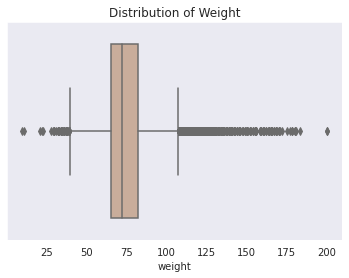

In [ ]:
sns.set_style('dark')
sns.boxplot(data['weight'],palette='pink')
plt.title('Distribution of Weight')

<p> From the boxplot of weight feature, we can see that there are some outliers.So we will remove these outliers.

In [ ]:
for i in range(90,101):
    print('{} Percentile is ='.format(i),np.percentile(data['weight'], i))


90 Percentile is = 93.0
91 Percentile is = 94.0
92 Percentile is = 95.0
93 Percentile is = 97.0
94 Percentile is = 98.0
95 Percentile is = 100.0
96 Percentile is = 103.0
97 Percentile is = 105.0
98 Percentile is = 110.0
99 Percentile is = 117.0
100 Percentile is = 200.0


In [ ]:
for i in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print('{} Percentile is ='.format(i),np.percentile(data['weight'], i))

99.1 Percentile is = 119.0
99.2 Percentile is = 120.0
99.3 Percentile is = 120.0
99.4 Percentile is = 123.0
99.5 Percentile is = 125.0
99.6 Percentile is = 128.0
99.7 Percentile is = 130.0
99.8 Percentile is = 135.0
99.9 Percentile is = 150.0
100 Percentile is = 200.0


<p> We observe that 99.9 % of the patients in the dataset have weight less than 150 kg. We will keep only those patients in our dataset who have weight less than 150 kg. If for a particular patient, the weight is more than 150 kg, then most likely that patient's weight is an outlier which we will remove.<p>

In [ ]:
data=data[data['weight']<=150]
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


<h3>3.3.3. Univariate Analysis of the ap_hi (Systolic blood pressure) Feature </h3>

<p style="font-size:18px;"> <b>Q1.</b> What type of feature ap_hi is ?</p>
<p style="font-size:16px;"><b>Ans.</b> ap_hi is a numerical feature. </p>


Text(0.5, 1.0, 'Distribution of Systolic Blood Pressure')

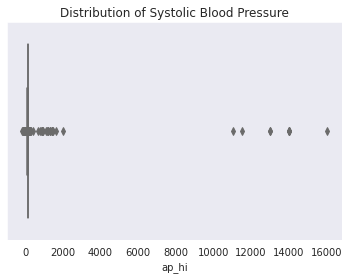

In [ ]:
sns.set_style('dark')
sns.boxplot(data['ap_hi'],palette='pink')
plt.title('Distribution of Systolic Blood Pressure')

<p> From the boxplot of ap_hi feature, we can see that there are huge number of outliers. Such large values of systolic blood pressure are not possible because the normal value of systolic blood pressure is less than or equal to 120 mm Hg.<p>

In [ ]:
for i in range(90,101):
    print('{} Percentile is ='.format(i),np.percentile(data['ap_hi'], i))


90 Percentile is = 150.0
91 Percentile is = 150.0
92 Percentile is = 150.0
93 Percentile is = 160.0
94 Percentile is = 160.0
95 Percentile is = 160.0
96 Percentile is = 160.0
97 Percentile is = 160.0
98 Percentile is = 170.0
99 Percentile is = 180.0
100 Percentile is = 16020.0


In [ ]:
for i in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print('{} Percentile is ='.format(i),np.percentile(data['ap_hi'], i))

99.1 Percentile is = 180.0
99.2 Percentile is = 180.0
99.3 Percentile is = 180.0
99.4 Percentile is = 180.0
99.5 Percentile is = 190.0
99.6 Percentile is = 190.0
99.7 Percentile is = 196.36900000000605
99.8 Percentile is = 200.0
99.9 Percentile is = 220.0
100 Percentile is = 16020.0


<p> We found that 99.9 % of the patients in the dataset have systolic blood pressure less than 220 mm of Hg. We will keep only those patients in our dataset who have systolic blood pressure less than 220 mm of Hg. If for a particular patient, the systolic blood pressure is more than 220 mm of Hg, then most likely that patient's systolic blood pressure is an outlier which we will remove.<p>

In [ ]:
data=data[data['ap_hi']<=220]
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


<h3>3.3.4. Univariate Analysis of the ap_lo (Diastolic blood pressure) Feature </h3>

<p style="font-size:18px;"> <b>Q1.</b> What type of feature ap_lo is ?</p>
<p style="font-size:16px;"><b>Ans.</b> ap_lo is a numerical feature. </p>


Text(0.5, 1.0, 'Distribution of Diastolic Blood Pressure')

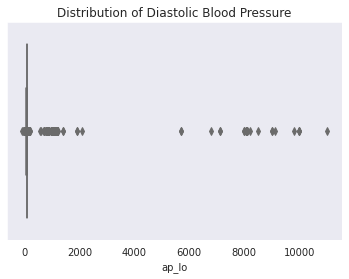

In [ ]:
sns.set_style('dark')
sns.boxplot(data['ap_lo'],palette='pink')
plt.title('Distribution of Diastolic Blood Pressure')

<p> From the boxplot of ap_lo feature, we can see that there are huge number of outliers. Such large values of diastolic blood pressure are not possible because the normal value of diastolic blood pressure is less than or equal to 80 mm Hg.<p>

In [ ]:
for i in range(90,101):
    print('{} Percentile is ='.format(i),np.percentile(data['ap_lo'], i))


90 Percentile is = 90.0
91 Percentile is = 90.0
92 Percentile is = 100.0
93 Percentile is = 100.0
94 Percentile is = 100.0
95 Percentile is = 100.0
96 Percentile is = 100.0
97 Percentile is = 100.0
98 Percentile is = 110.0
99 Percentile is = 1000.0
100 Percentile is = 11000.0


In [ ]:
for i in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print('{} Percentile is ='.format(i),np.percentile(data['ap_lo'], i))

99.1 Percentile is = 1000.0
99.2 Percentile is = 1000.0
99.3 Percentile is = 1000.0
99.4 Percentile is = 1000.0
99.5 Percentile is = 1000.0
99.6 Percentile is = 1000.0
99.7 Percentile is = 1100.0
99.8 Percentile is = 1100.0
99.9 Percentile is = 1110.0
100 Percentile is = 11000.0


In [ ]:
for i in [98.1,98.2,98.3,98.4,98.5,98.6,98.7,98.8,98.9,99]:
    print('{} Percentile is ='.format(i),np.percentile(data['ap_lo'], i))

98.1 Percentile is = 110.0
98.2 Percentile is = 115.0
98.3 Percentile is = 120.0
98.4 Percentile is = 120.0
98.5 Percentile is = 120.56500000000233
98.6 Percentile is = 150.0
98.7 Percentile is = 1000.0
98.8 Percentile is = 1000.0
98.9 Percentile is = 1000.0
99 Percentile is = 1000.0


<p> We observe that 98.6 % of the patients in the dataset have diastolic blood pressure less than 145 mm of Hg. We will keep only those patients in our dataset who have diastolic blood pressure less than 145 mm of Hg. If for a particular patient, the diastolic blood pressure is more than 145 mm of Hg, then most likely that patient's diastolic blood pressure is an outlier which we will remove.<p>

In [ ]:
data=data[data['ap_lo']<=145]
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
incorrect_data=data[data['ap_lo']>data['ap_hi']]
incorrect_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
567,815,58.0,1,168,78.0,14,90,2,1,0,0,1,1
636,913,56.0,2,169,68.0,70,110,1,1,0,0,1,0
927,1294,60.0,2,175,70.0,14,90,3,1,0,0,1,1
979,1360,50.0,1,172,65.0,11,80,1,3,0,0,1,0
1600,2260,53.0,1,165,66.0,12,80,1,1,0,0,1,0


<p> It was found that for some patients, diastolic blood pressure was greater than systolic blood pressure. This is incorrect data because normally, systolic blood pressure is more than diastolic blood pressure. So we will remove all those datapoints in which diastolic blood pressure is greater than systolic blood pressure.

In [ ]:
data=data[data['ap_hi']>data['ap_lo']]
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


<h2>3.4. Feature Engineering </h2>

<h3>3.4.1. bmi (Body Mass Index) Feature </h3>

<p> The BMI of a patient can be a useful feature in predicting whether the patient has heart disease or not<p>

In [ ]:
data['bmi'] = (data['weight']/(data['height']/100)**2).round(1)
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,22.0
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,34.9
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,23.5
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,28.7
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,23.0


<h4>3.4.1.1. Univariate Analysis of bmi Feature </h4>

<p style="font-size:18px;"> <b>Q1.</b> What type of feature bmi is ?</p>
<p style="font-size:16px;"><b>Ans.</b> bmi is a numerical feature. </p>


Text(0.5, 1.0, 'Distribution of Body Mass Index')

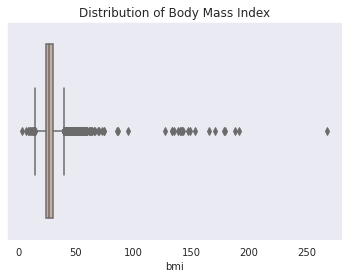

In [ ]:
sns.set_style('dark')
sns.boxplot(data['bmi'],palette='pink')
plt.title('Distribution of Body Mass Index')

<p> From the boxplot of bmi feature, we can see that there are a few outliers which we will remove.<p> 

In [ ]:
for i in range(90,101):
    print('{} Percentile is ='.format(i),np.percentile(data['bmi'], i))


90 Percentile is = 34.4
91 Percentile is = 34.9
92 Percentile is = 35.3
93 Percentile is = 35.9
94 Percentile is = 36.5
95 Percentile is = 37.2
96 Percentile is = 38.2
97 Percentile is = 39.3
98 Percentile is = 41.0
99 Percentile is = 44.0
100 Percentile is = 267.8


In [ ]:
for i in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print('{} Percentile is ='.format(i),np.percentile(data['bmi'], i))

99.1 Percentile is = 44.4
99.2 Percentile is = 44.8
99.3 Percentile is = 45.5
99.4 Percentile is = 46.346000000000636
99.5 Percentile is = 47.1
99.6 Percentile is = 48.1
99.7 Percentile is = 49.5
99.8 Percentile is = 52.0820000000007
99.9 Percentile is = 55.6
100 Percentile is = 267.8


<p>The bmi value for severely obese people is roughly 50. We can see that the 99.9% of the patients have bmi values which are less than 55. If for any patient, the bmi value is more than 55, then it means that the bmi of this person is an outlier which we will remove.<p>

In [ ]:
data=data[data['bmi']<=55]
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,22.0
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,34.9
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,23.5
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,28.7
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,23.0


<h3>3.4.2. bp (Blood Pressure) Feature </h3>

<p> The blood pressure of a patient can be a useful feature in predicting whether the patient has heart disease or not.<p>

<p> bp is a categorical variable. We will create categories for bp based on the values of ap_hi (Systolic Blood Pressure). The categories which bp can take are :-<p>

<p> 0 : normal blood pressure <p>
<p> 1 : elevated blood pressure <p>
<p> 2 : hypertension <p>

In [ ]:
# Use pandas.cut() when you need to segment and sort data values into bins. 
# This function is also useful for going from a continuous variable to a categorical variable.

category=[0,1,2]
data['bp']=pd.cut(data['ap_hi'], [0, 120, 130, 250], right=False, labels=category)
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bp
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,22.0,0
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,34.9,2
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,23.5,2
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,28.7,2
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,23.0,0


<p> Let us find out the percentage of data which remains after data cleaning.<p>

In [ ]:
percentage_of_data_which_remains=((data['id'].size*1.0)/(raw_data['id'].size*1.0))*100
print(percentage_of_data_which_remains)

97.85571428571428


<h3> Observation 

*   97% of the data remains after data cleaning.

<h2>3.5. Train, Cross Validation and Test Split</h2>

<p> We observe that this dataset does not have a temporal nature i.e. it does not change with time. In addition, our data does not contain timestamps. So we will not be performing time based splitting. We will split our data randomly. We will be splitting our data into train, cross validate and test in the ratio 64:16:20. This means that given a datapoint, there is a 64% probability that it will go into train data, there is a 16% probability that it will go into cross validation data and 20% probability that it will go into test data.<p>

In [ ]:
X = data.drop(['cardio','id'],axis=1)
y = data['cardio']

In [ ]:
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.20)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [ ]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 43839
Number of data points in test data: 13700
Number of data points in cross validation data: 10960


<h3>3.5.1. Distribution of y_i's in Train, Test and Cross Validation datasets</h3>

<p> For our model to work well, we want that the distribution of actual class labels should be roughly the same in train, cross validation and test datasets. For this we have performed stratified splitting.<p>

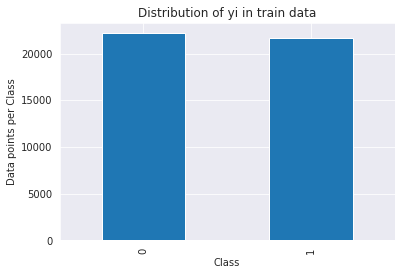

Number of data points in class 1 : 22163 ( 50.555 %)
Number of data points in class 2 : 21676 ( 49.445 %)
--------------------------------------------------------------------------------


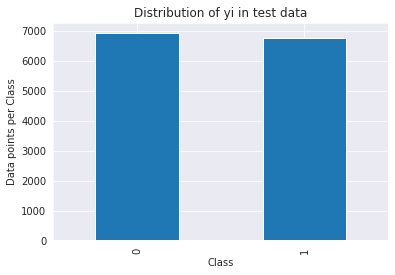

Number of data points in class 1 : 6926 ( 50.555 %)
Number of data points in class 2 : 6774 ( 49.445 %)
--------------------------------------------------------------------------------


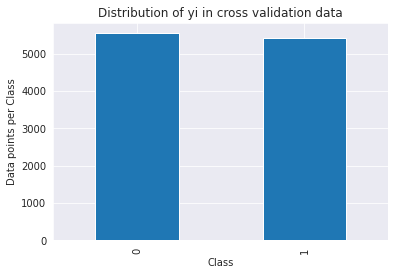

Number of data points in class 1 : 5541 ( 50.557 %)
Number of data points in class 2 : 5419 ( 49.443 %)


In [ ]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = y_train.value_counts().sort_index()
test_class_distribution = y_test.value_counts().sort_index()
cv_class_distribution = y_cv.value_counts().sort_index()


train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/y_train.shape[0]*100), 3), '%)')


print('-'*80)


test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/y_test.shape[0]*100), 3), '%)')


print('-'*80)


cv_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()
sorted_yi = np.argsort(-cv_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/y_cv.shape[0]*100), 3), '%)')


<h3> Observation 

*   From these plots we can see that the distribution of yi's or the actual class labels is similar in train, test and cross validation datasets. It is extremely important that the distribution of yi's or the actual class labels should be similar in train, test and cross validation because only then our machine learning model will work well.

<h2>3.6. Encoding the Categorical Features</h2>

<p> There are three categorical variables in our dataset which are cholestrol, gluc and bp. We will encode these categorical features by performing one hot encoding.<p> 

In [ ]:
X_train=pd.get_dummies(X_train,columns=['cholesterol','gluc','bp'])
X_train.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,bmi,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,bp_0,bp_1,bp_2
14567,61.0,2,180,87.0,120,80,0,0,0,26.9,1,0,0,1,0,0,0,1,0
63376,46.0,1,158,70.0,140,90,0,0,1,28.0,1,0,0,1,0,0,0,0,1
22443,57.0,1,167,84.0,160,100,0,0,1,30.1,1,0,0,1,0,0,0,0,1
58786,54.0,1,162,67.0,120,80,0,0,1,25.5,1,0,0,0,0,1,0,1,0
64167,57.0,1,168,73.0,110,70,0,0,1,25.9,1,0,0,1,0,0,1,0,0


In [ ]:
X_test=pd.get_dummies(X_test,columns=['cholesterol','gluc', 'bp'])
X_test.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,bmi,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,bp_0,bp_1,bp_2
69932,42.0,2,171,67.0,110,60,0,0,1,22.9,1,0,0,1,0,0,1,0,0
25843,42.0,1,157,68.0,90,60,0,0,0,27.6,0,1,0,1,0,0,1,0,0
54654,58.0,2,168,91.0,150,70,0,0,1,32.2,1,0,0,1,0,0,0,0,1
67627,58.0,2,175,74.0,120,80,0,0,0,24.2,1,0,0,1,0,0,0,1,0
25389,58.0,1,174,70.0,120,70,0,0,0,23.1,1,0,0,1,0,0,0,1,0


In [ ]:
X_cv=pd.get_dummies(X_cv,columns=['cholesterol','gluc','bp'])
X_cv.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,bmi,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,bp_0,bp_1,bp_2
64772,53.0,1,160,70.0,130,90,0,0,0,27.3,0,1,0,1,0,0,0,0,1
9206,44.0,2,172,102.0,130,90,0,0,0,34.5,1,0,0,1,0,0,0,0,1
59566,58.0,1,175,75.0,120,80,0,0,1,24.5,1,0,0,1,0,0,0,1,0
14524,52.0,1,166,80.0,150,100,0,0,1,29.0,1,0,0,1,0,0,0,0,1
60646,58.0,2,174,68.0,180,100,0,0,1,22.5,1,0,0,1,0,0,0,0,1


<h2>3.7. Normalize the Numerical Features</h2>

<p> The numerical features in our dataset are age, height, weight, ap_hi, ap_lo and bmi. Since the features in our dataset have different scales, we will normalize these features. As a result of normalization, the values of the transformed features will lie in the  range [0,1]. <p>

In [ ]:
features_to_be_scaled = ['age','height','weight','ap_hi', 'ap_lo','bmi']

scaler=MinMaxScaler()
scaler.fit(X_train[features_to_be_scaled])
X_train[features_to_be_scaled] = scaler.transform(X_train[features_to_be_scaled])
X_test[features_to_be_scaled] = scaler.transform(X_test[features_to_be_scaled])
X_cv[features_to_be_scaled] = scaler.transform(X_cv[features_to_be_scaled])

In [ ]:
X_train.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,bmi,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,bp_0,bp_1,bp_2
14567,0.885714,2,0.857143,0.546763,0.519231,0.714286,0,0,0,0.455253,1,0,0,1,0,0,0,1,0
63376,0.457143,1,0.542857,0.424460,0.615385,0.761905,0,0,1,0.476654,1,0,0,1,0,0,0,0,1
22443,0.771429,1,0.671429,0.525180,0.711538,0.809524,0,0,1,0.517510,1,0,0,1,0,0,0,0,1
58786,0.685714,1,0.600000,0.402878,0.519231,0.714286,0,0,1,0.428016,1,0,0,0,0,1,0,1,0
64167,0.771429,1,0.685714,0.446043,0.471154,0.666667,0,0,1,0.435798,1,0,0,1,0,0,1,0,0


In [ ]:
X_test.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,bmi,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,bp_0,bp_1,bp_2
69932,0.342857,2,0.728571,0.402878,0.471154,0.619048,0,0,1,0.377432,1,0,0,1,0,0,1,0,0
25843,0.342857,1,0.528571,0.410072,0.375000,0.619048,0,0,0,0.468872,0,1,0,1,0,0,1,0,0
54654,0.800000,2,0.685714,0.575540,0.663462,0.666667,0,0,1,0.558366,1,0,0,1,0,0,0,0,1
67627,0.800000,2,0.785714,0.453237,0.519231,0.714286,0,0,0,0.402724,1,0,0,1,0,0,0,1,0
25389,0.800000,1,0.771429,0.424460,0.519231,0.666667,0,0,0,0.381323,1,0,0,1,0,0,0,1,0


In [ ]:
X_cv.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,bmi,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,bp_0,bp_1,bp_2
64772,0.657143,1,0.571429,0.424460,0.567308,0.761905,0,0,0,0.463035,0,1,0,1,0,0,0,0,1
9206,0.400000,2,0.742857,0.654676,0.567308,0.761905,0,0,0,0.603113,1,0,0,1,0,0,0,0,1
59566,0.800000,1,0.785714,0.460432,0.519231,0.714286,0,0,1,0.408560,1,0,0,1,0,0,0,1,0
14524,0.628571,1,0.657143,0.496403,0.663462,0.809524,0,0,1,0.496109,1,0,0,1,0,0,0,0,1
60646,0.800000,2,0.771429,0.410072,0.807692,0.809524,0,0,1,0.369650,1,0,0,1,0,0,0,0,1


<p> We will now create a utility function which plots the confusion matrix, precision matrix and recall matrix.<p>

In [ ]:
# Reference: https://appliedaicourse.com/

def plot_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing C in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    # representing B in heatmap format
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    print("Sum of columns in recall matrix",B.sum(axis=0))
    
    plt.show()

<h1>4. Machine Learning Models</h1>

<h2>4.1. Random Model (Baseline)</h2>

<p style="font-size:18px;"> <b>Q1.</b> What is a random model ?</p>
<p style="font-size:16px;"><b>Ans.</b> We want our model to give class probabilities as output. If we use a random model, it will randomly generate any value between 0 and 1 as the class probability.</p>


<p style="font-size:18px;"> <b>Q2.</b> Why are we using a random model for prediction ?</p>
<p style="font-size:16px;"><b>Ans.</b> One of the performance metrics for this problem is log loss. Computing the log loss of a random classifier will tell us how badly our own machine learning model is performing. The log loss of a random classifier is the maximum log loss or the worst possible log loss. Any sensible machine learning model should have a log loss greater than equal to 0 and less than the log loss of random classifier. So, we are using a random model as a baseline against which we are going to compare our model performance.</p>


<p style="font-size:18px;"> <b>Q3.</b> When do we say that our machine learning model is a good model ?</p>
<p style="font-size:16px;"><b>Ans.</b> If the log loss of our machine learning model is much less than the log loss of random classifier then we will say that our machine learning model is a good model.</p>


Log Loss on Cross Validation Data using Random Model 0.8953926113417563
Log loss on Test Data using Random Model 0.8799113276783228
Sum of columns in precision matrix [1. 1.]
Sum of columns in recall matrix [1. 1.]


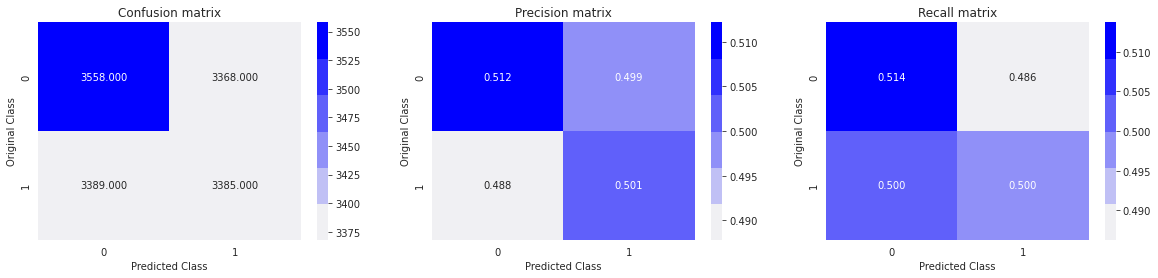

In [ ]:
# Reference: https://appliedaicourse.com/

# we need to generate 2 numbers and the sum of numbers should be 1
# one solution is to genarate 2 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039

cv_data_len = X_cv.shape[0]

# We will create an output array which has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,2))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,2)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log Loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


#we create a output array that has exactly same as the test data
test_data_len = X_test.shape[0]

test_predicted_y = np.zeros((test_data_len,2))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,2)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_matrix(y_test, predicted_y)

<h3> Observations<h3>

*   Our random model has a log loss of 0.88 approximately. This is the worst possible log loss which any sensible machine learning model that we train on this dataset can have. Our model will be considered as a sensible model if and only if it's log loss lies in the range [0 , 0.88).

*   Since the distribution of actual class label is similar in train data, cross validate data and test data we can see from the confusion matrix that none of the classes dominate. The random model is equally confusing between the two classes.

*   The precision of a random model for each class is very low i.e. 0.5 in 
comparison to the precision of an ideal model which is 1  for each class.

*    The recall of a random model for each class is very low i.e. 0.5 in comparison to the recall of an ideal model which is 1  for each class.










<h2>4.2. KNN Model</h2>

<p style="font-size:18px;"> <b>Q1.</b> Why are we using a KNN model ?</p>
<p style="font-size:16px;"><b>Ans.</b> The number of features in our dataset are not very large. KNN model tends to work well when the number of features in our dataset are not very large.</p>


<p style="font-size:18px;"> <b>Q2.</b> Why are we using a calibrated classifier ?</p>
<p style="font-size:16px;"><b>Ans.</b> The output of the KNN Classifier may not be class probabilities. If we feed the output of the KNN model as input to the calibrated classifier, the output of the calibrated classifier can be interpreted as class probability. It is important to use a calibrated classifier especially when we have log loss as our performance metric because log loss uses probabilities.</p>


<p style="font-size:18px;"> <b>Q2.</b> How will we choose the best value of our hyperparameter k ?</p>
<p style="font-size:16px;"><b>Ans.</b> The value of k for which we get the lowest cross validation error will be the best value of k.</p>


log_loss for k =  5 is 0.5926688733042005
log_loss for k =  7 is 0.5835257558597482
log_loss for k =  9 is 0.5784505214731447
log_loss for k =  11 is 0.5741141227205713
log_loss for k =  13 is 0.5707362266134336


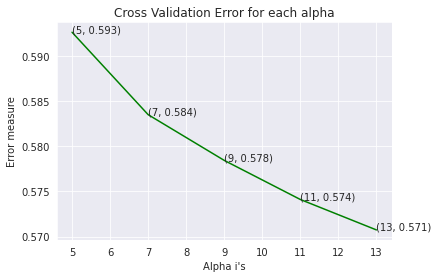

For values of best alpha =  13 The train log loss is: 0.522506987868308
For values of best alpha =  13 The cross validation log loss is: 0.5707362266134336
For values of best alpha =  13 The test log loss is: 0.5685733151698885
Number of missclassified point : 0.2783941605839416
Sum of columns in precision matrix [1. 1.]
Sum of columns in recall matrix [1. 1.]


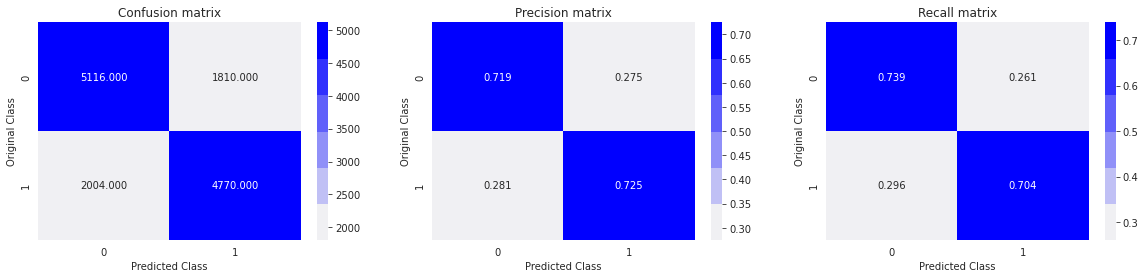

In [ ]:
# Reference: https://appliedaicourse.com/

# In this code alpha stands for k which is a hyperparameter in the KNN model.

alpha = [x for x in range(5, 15, 2)] 

cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train,y_train)
    predict_y = sig_clf.predict_proba(X_cv)                   
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


# Retraining the KNN model with the best value of alpha (k)
k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)   


# Calculate training error
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))

# Calculate cross validation error
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))

# Calculate the test error
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))

# Calculate the percentage of misclassified points
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(X_test)- y_test))/y_test.shape[0])

# Plot the confusion matrix, precision matrix and recall matrix.
plot_matrix(y_test, sig_clf.predict(X_test))

<h2> Observations</h2>

*  Since the cross validation error and the test error of KNN model is much less than that of random model, this means that the KNN model is performing much better than the random model.

*   Since the train error and the cross validation error of the KNN model are not very different from each other, this means that the KNN model is not overfitting.

*   The precision of KNN model for class 1 is 72.5% and the precision for class 0 is 71.9% .

*  The recall of KNN model for class 1 is 70.4% and the recall of KNN model for class 0 is 73.9% .







<h2>4.3. Logistic Regression</h2>

<p style="font-size:18px;"> <b>Q1.</b> Why are we using a Logistic Regression model ?</p>
<p style="font-size:16px;"><b>Ans.</b>  Logistic Regression model tends to work well when the number of features in the dataset are not very large. When the dimensionality of our data is small, we can train the logistic regression model very quickly. </p>


<p style="font-size:18px;"> <b>Q2.</b> Why are we using a calibrated classifier ?</p>
<p style="font-size:16px;"><b>Ans.</b> When we have log loss as our performance metric then it is extremely important to train a calibrated classifier on top of our trained base model. The output of a calibrated classifier can be interpreted as class probability.</p>


<p style="font-size:18px;"> <b>Q2.</b> How will we choose the best value of our hyperparameter C ?</p>
<p style="font-size:16px;"><b>Ans.</b> The value of C for which we get the lowest cross validation error will be the best value of C.</p>


log_loss for c =  0.001 is 0.5778183586072976
log_loss for c =  0.01 is 0.5704229386603736
log_loss for c =  0.1 is 0.5639863067449712
log_loss for c =  1 is 0.5605713461418732
log_loss for c =  10 is 0.5602278021087085
log_loss for c =  100 is 0.5602019494960625
log_loss for c =  1000 is 0.5601973854410619


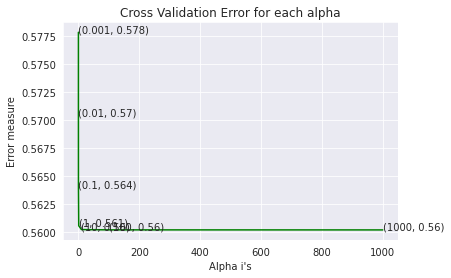

For values of best alpha =  1000 The train log loss is: 0.5561569388184688
For values of best alpha =  1000 The cross validation log loss is: 0.5601973854410619
For values of best alpha =  1000 The test log loss is: 0.5561659742675735
Number of missclassified point : 0.27226277372262775
Sum of columns in precision matrix [1. 1.]
Sum of columns in recall matrix [1. 1.]


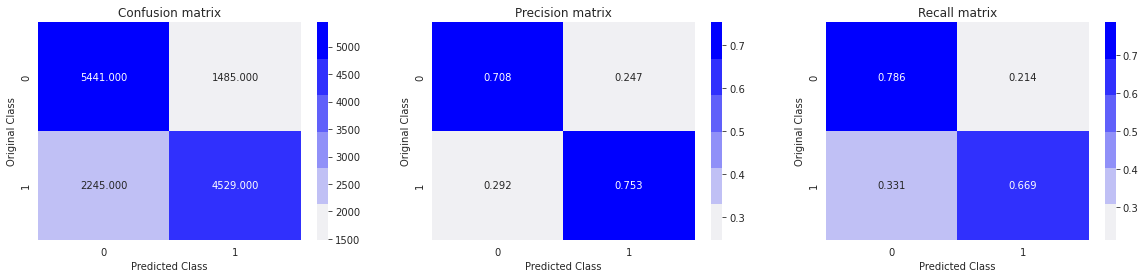

In [ ]:
# Reference: https://appliedaicourse.com/

# In this code alpha stands for C which is the hyperparameter in the Logistic Regression model.

alpha = [10 ** x for x in range(-3, 4)]

cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced',solver='liblinear')
    logisticR.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

# Retraining the model on best value of alpha (C)
logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced',solver='liblinear')
logisticR.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train, y_train)
pred_y=sig_clf.predict(X_test)

# Calculate training error
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], 'The train log loss is:',log_loss(y_train, predict_y, labels=logisticR.classes_, eps=1e-15))

# Calculate cross validation error
predict_y = sig_clf.predict_proba(X_cv)
print ('For values of best alpha = ', alpha[best_alpha], 'The cross validation log loss is:',log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)

# Calculate the test error
print ('For values of best alpha = ', alpha[best_alpha], 'The test log loss is:',log_loss(y_test, predict_y, labels=logisticR.classes_, eps=1e-15))

# Calculate the percentage of misclassified points
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(X_test)- y_test))/y_test.shape[0])

# Plot the confusion matrix, precision matrix and recall matrix.
plot_matrix(y_test, sig_clf.predict(X_test))

<h2> Observations</h2>

*  Since the cross validation error and the test error of Logistic Regression  model is much less than that of random model, this means that the Logistic Regression model is performing much better than the random model.

*   Since the train error and the test error of the Logistic Regression model are not very different from each other, this means that the Logistic Regression model is not overfitting.

*   The precision of Logistic Regression model for class 1 is 75.3% and the precision for class 0 is 70.8% .

*  The recall of Logistic Regression model for class 1 is 66.9% and the recall of Logistic Regression model for class 0 is 78.6% . 











<h3>4.3.1. Feature importance from Logistic Regression Model</h3>

<p style="font-size:18px;"> <b>Q1.</b> How do we get feature importance from Logistic Regression model ?</p>
<p style="font-size:16px;"><b>Ans.</b> If the weight in the weight vector corresponding to a particular feature is largely negative or largely positive then it means that the feature is an important feature. </p>


In [ ]:
# Reference: https://stackoverflow.com/questions/54832246/how-to-get-the-feature-weight-if-we-use-calibrated-cv-for-linear-kernal-on-sgd-c

most_imp_features=logisticR.coef_
print(most_imp_features)

[[ 1.74738091e+00  5.57296247e-03 -1.03028424e-01  1.27323646e+00
   7.70048953e+00  2.02929809e+00 -2.11218393e-01 -2.20944320e-01
  -2.45618471e-01  1.88514083e-01 -1.65161548e+00 -1.26909195e+00
  -5.87059494e-01 -1.06770681e+00 -1.03973791e+00 -1.40032220e+00
  -1.38554192e+00 -1.40391580e+00 -7.18309207e-01]]


<h2>4.4. Random Forest Classifier</h2>

<p style="font-size:18px;"> <b>Q1.</b> Why are we using a Random Forest Classifier ?</p>
<p style="font-size:16px;"><b>Ans.</b> Random Forests tends to work very well when the number of features in the dataset are not very large. They work well when we have those categorical variables which do not take up a lot of categories.</p>


<p style="font-size:18px;"> <b>Q2.</b> Why are we using a calibrated classifier ?</p>
<p style="font-size:16px;"><b>Ans.</b> When we have log loss as our performance metric then it is extremely important to train a calibrated classifier on top of our trained base model.The output of a calibrated classifier can be interpreted as class probability.</p>


<p style="font-size:18px;"> <b>Q2.</b> How will we choose the best value of our hyperparameter n_estimators ?</p>
<p style="font-size:16px;"><b>Ans.</b> The value of n_estimators for which we get the lowest cross validation error will be the best value of n_estimators.</p>


log_loss for c =  10 is 0.5820930371376373
log_loss for c =  50 is 0.575811329254393
log_loss for c =  100 is 0.5749613487937564
log_loss for c =  500 is 0.5741579857988397
log_loss for c =  1000 is 0.5740273870558072
log_loss for c =  2000 is 0.5738744271232451
log_loss for c =  3000 is 0.5738970962915321


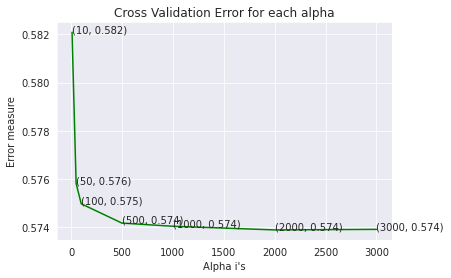

For values of best alpha =  2000 The train log loss is: 0.30895429003262226
For values of best alpha =  2000 The cross validation log loss is: 0.5738744271232451
For values of best alpha =  2000 The test log loss is: 0.5720059255150151
Number of missclassified point : 0.2865693430656934
Sum of columns in precision matrix [1. 1.]
Sum of columns in recall matrix [1. 1.]


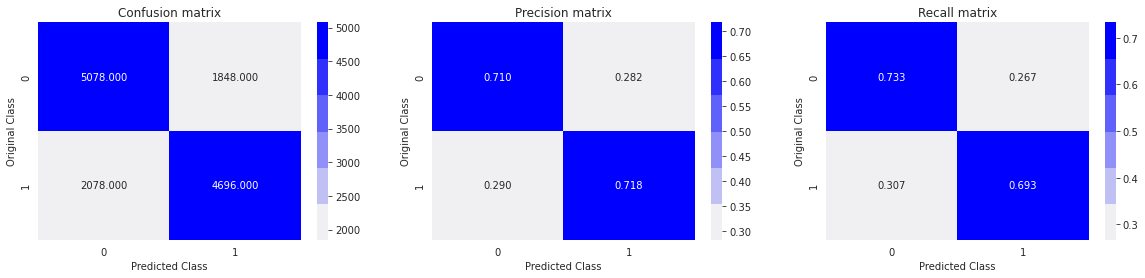

In [ ]:
# Reference: https://appliedaicourse.com/

# In this code alpha stands for n_estimators which is the hyperparameter in the Random Forest model.

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
train_log_error_array=[]

for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

# Retraining the model on best value of alpha (n_estimators)
r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)

# Calculate training error
predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))

# Calculate cross validation error
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))

# Calculate test error
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))

# Calculate the percentage of misclassified points
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(X_test)- y_test))/y_test.shape[0])

# Plot the confusion matrix, precision matrix and recall matrix.
plot_matrix(y_test, sig_clf.predict(X_test))

<h2> Observations</h2>

*  Since the cross validation error and the test error of Random Forest Classifier  is much less than that of Random model, this means that the Random Forest Classifier is performing much better than the random model.

*   Since the train error and the test error of the Random Forest Classifier are different from each other, this means that the Random Forest Classifier  is slightly overfitting. But that is not a problem because overall Random Forests reduce variance.

*   The precision of Random Forest Classifier for class 1 is 71.8% and the precision for class 0 is 71.0% .

*  The recall of Random Forest Classifier for class 1 is 69.3% and the recall of Random Forest Classifier for class 0 is 73.3% . 











<h3>4.4.1. Feature importance from Random Forest Model</h3>

<p>We can obtain the feature importance from the Random Forest Model very easily.<p>

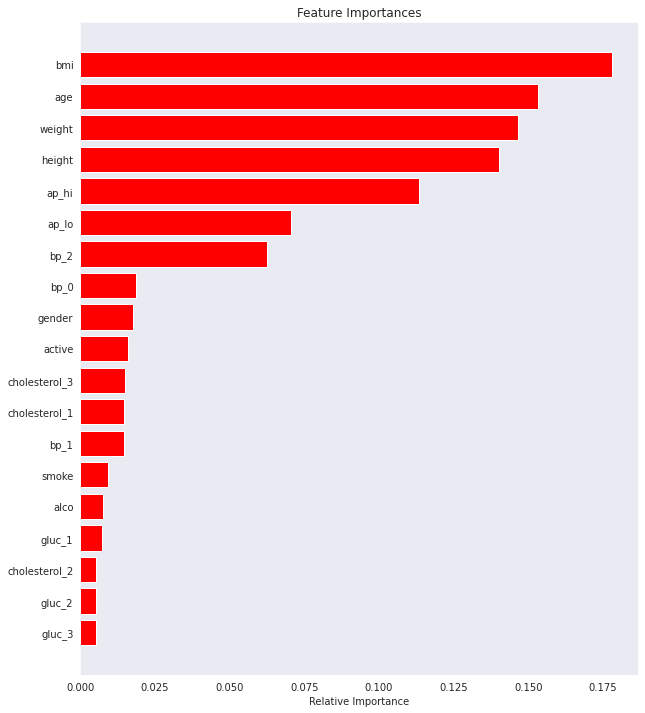

In [ ]:
# Reference: https://appliedaicourse.com/

features = X_train.columns
importances = r_cfl.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<h2> Observations on Feature Importance</h2>

<p> According to Random Forest model, bmi is the most important feature in predicting whether a patient has heart disease or not followed age, weight and height.

<h2>4.5. XGboost Classifier</h2>

<p style="font-size:18px;"> <b>Q1.</b> Why are we using a XGBoost Classifier ?</p>
<p style="font-size:16px;"><b>Ans.</b> XGboost Classifier tends to work very well when the number of observations in the training data are large and when the number of features in the dataset are less than the number of observations in the training data It performs very well when our dataset contains both categorical and numerical features.</p>




<p style="font-size:18px;"> <b>Q2.</b> Why are we using a calibrated classifier ?</p>
<p style="font-size:16px;"><b>Ans.</b> When we have log loss as our performance metric then it is extremely important to train a calibrated classifier on top of our trained base model.The output of a calibrated classifier can be interpreted as class probability.</p>


<p style="font-size:18px;"> <b>Q2.</b> How will we choose the best value of our hyperparameter n_estimators ?</p>
<p style="font-size:16px;"><b>Ans.</b> The value of n_estimators for which we get the lowest cross validation error will be the best value of n_estimators.</p>


log_loss for c =  10 is 0.5537263146161117
log_loss for c =  50 is 0.5481743648868398
log_loss for c =  100 is 0.547573624289587
log_loss for c =  500 is 0.5485446918024542
log_loss for c =  1000 is 0.550042512356982
log_loss for c =  2000 is 0.551974548660246


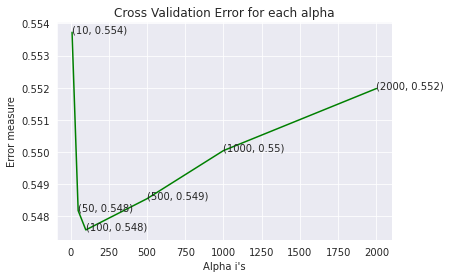

For values of best alpha =  100 The train log loss is: 0.5364310179058611
For values of best alpha =  100 The cross validation log loss is: 0.5475172190877672
For values of best alpha =  100 The test log loss is: 0.5421740027558314
Number of missclassified point : 0.2678832116788321
Sum of columns in precision matrix [1. 1.]
Sum of columns in recall matrix [1. 1.]


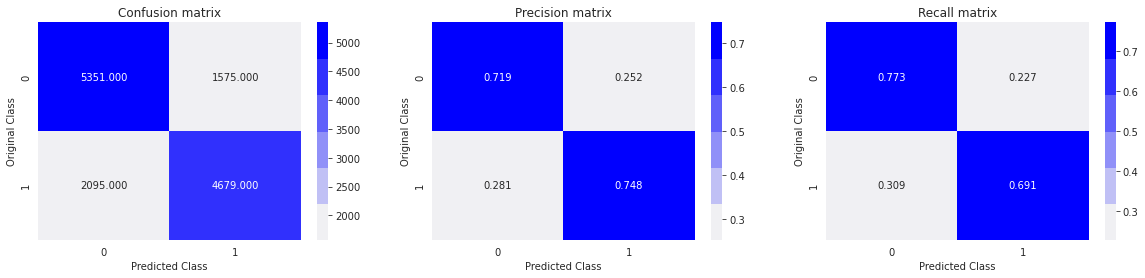

In [ ]:
# Reference: https://appliedaicourse.com/

# In this code alpha stands for n_estimators which is the hyperparameter in XGBoost model.

alpha=[10,50,100,500,1000,2000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1,tree_method="gpu_hist")
    x_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

# Retraining the model on best value of alpha (n_estimators)
x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)

# Calculate training error
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))

# Calculate cross validation error
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))

# Calculate the test error
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))

# Calculate the percentage of misclassified points
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(X_test)- y_test))/y_test.shape[0])

# Plot the confusion matrix, precision matrix and recall matrix.
plot_matrix(y_test, sig_clf.predict(X_test))

<h2> Observations<h2>

*   Since the cross validation error and the test error of XGBoost model is much less than that of the random model, this means that the XGBoost model is performing much better than the random model.
*   Since the train error and the test error of the XGBoost model are not very different from each other, this means that the XGBoost model is not overfitting.
*   The precision of XGBoost model for class 1 is 74.8% and the precision for class 0 is 71.9%.
*  The recall of XGBoost model for class 1 is 69.1% and the recall of XGBoost model for class 0 is 77.3% . 














<h3>4.5.1. Hyperparamter tuning of xgboost using random search</h3>




In [ ]:
# Reference: https://appliedaicourse.com/

params={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}

clf = XGBClassifier(tree_method="gpu_hist")
RSxgb_clf = RandomizedSearchCV(clf, params, verbose=10,n_jobs=-1)
RSxgb_clf.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  33 out of  50 | elapsed:  4.2min remaining:  2.1min
[Parallel(n_jobs=-1)]: Done  39 out of  50 | elapsed:  5.3min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed: 11.6min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 14.7min finished


RandomizedSearchCV(estimator=XGBClassifier(tree_method='gpu_hist'), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.1, 0.3, 0.5, 1],
                                        'learning_rate': [0.01, 0.03, 0.05, 0.1,
                                                          0.15, 0.2],
                                        'max_depth': [3, 5, 10],
                                        'n_estimators': [100, 200, 500, 1000,
                                                         2000],
                                        'subsample': [0.1, 0.3, 0.5, 1]},
                   verbose=10)

In [ ]:
RSxgb_clf.best_params_

{'subsample': 1,
 'n_estimators': 200,
 'max_depth': 3,
 'learning_rate': 0.15,
 'colsample_bytree': 1}

In [ ]:
best_model_xgb = XGBClassifier(subsample=1,n_estimators=200,max_depth=3,learning_rate=0.15,colsample_bytree=1,tree_method="gpu_hist")
best_model_xgb.fit(X_train, y_train)

sig_clf = CalibratedClassifierCV(best_model_xgb, method="sigmoid")
sig_clf.fit(X_train, y_train)

# Calculate the training error
predict_y = sig_clf.predict_proba(X_train)
print ('train loss',log_loss(y_train, predict_y))

# Calculate the cross validation error
predict_y = sig_clf.predict_proba(X_cv)
print ('cv loss',log_loss(y_cv, predict_y))

# Calculate the test error
predict_y = sig_clf.predict_proba(X_test)
print ('test loss',log_loss(y_test, predict_y))


train loss 0.5298095294373889
cv loss 0.5477452497999381
test loss 0.5420111571571475


<h3>4.5.2. Feature Importance from XGBoost Model</h3>

<p> We can obtain the feature importance from the XGBoost Model very easily.<p>

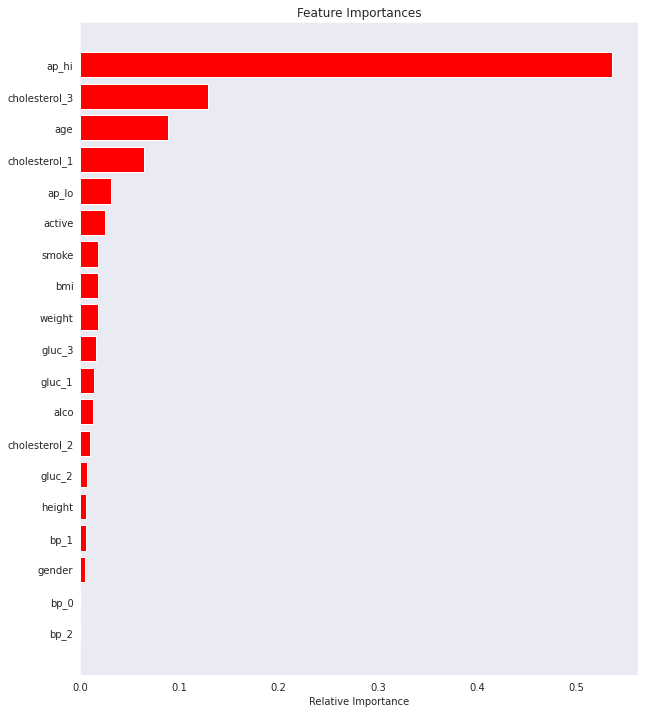

In [ ]:
# Reference: https://appliedaicourse.com/
features = X_train.columns
importances = x_cfl.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<h2> Observations on Feature Importance<h2>
<p> Systolic blood pressure is the most important feature in predicting whether a patient has heart disease or not followed by cholesterol and age.

<h2>4.6. Comparison of Models </h2>

In [ ]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ['Model','Train Error','CV Error','Test Error','Percentage of Misclassified Points']
table.add_row(['KNN','0.523','0.571','0.568','27.84%'])
table.add_row(['Logistic Regression','0.556','0.560','0.556','27.23%'])
table.add_row(['Random Forest Classifier','0.309','0.574','0.572','28.66%'])
table.add_row(['XGBoost','0.536','0.548','0.542','26.79%'])

print(table)

+--------------------------+-------------+----------+------------+------------------------------------+
|          Model           | Train Error | CV Error | Test Error | Percentage of Misclassified Points |
+--------------------------+-------------+----------+------------+------------------------------------+
|           KNN            |    0.523    |  0.571   |   0.568    |               27.84%               |
|   Logistic Regression    |    0.556    |  0.560   |   0.556    |               27.23%               |
| Random Forest Classifier |    0.309    |  0.574   |   0.572    |               28.66%               |
|         XGBoost          |    0.536    |  0.548   |   0.542    |               26.79%               |
+--------------------------+-------------+----------+------------+------------------------------------+


 <h1> 5. Conclusions</h1>

 <p> From the table above we conclude that XGBoost is the best model for predicting whether a patient has heart disease or not. It has the lowest value of test error or test log loss. It has the lowest percentage of misclassified points.




 <h1> 6. References </h1>

 https://www.cdc.gov/heartdisease/facts.htm#:~:text=Heart%20disease%20is%20the%20leading,1%20in%20every%204%20deaths.

https://www.cdc.gov/chronicdisease/resources/publications/factsheets/heart-disease-stroke.htm<p>

https://appliedaicourse.com/
